## CS545 Assignment 1

**Due date:**  9/7 at 11:59pm


### Preliminaries

We'll start with a little bit of notation... In supervised learning we work with a dataset of $N$ labeled examples: $\mathcal{D} = \{ (\mathbf{x}_i, y_i) \}_{i=1}^N$, where $\mathbf{x}_i$ is a $d$-dimensional vector (we always use boldface to denote vectors), and $y_i$ is the label associated with $\mathbf{x}_i$.  In a binary classification problem we'll usually use the values $\pm 1$ to denote positive/negative examples.


### Part 1:  measuring classifier error

First let's recall that the estimate of a classifier's error is given by:

$$E(h) = \frac{1}{N}\sum_{i=1}^N I(h(\mathbf{x}_i) \neq y_i),$$

where $I(\cdot)$ is the indicator function, and $h$ is the model/hypothesis we are trying to evaluate.

Whenever training a classifier, we like to know how well it's performing.  This is done by computing an estimate of the out of sample error:  pick an independent test set that was not used during training and compute the error of your classifier on this dataset (the test set).  You always want to know that your classifier is learning something, i.e. the error is smaller than what we would expect by chance, i.e. better than a model that simply guesses or picks a fixed answer.  Consider the following classifier, which always classifies an example as belonging to the majority class, i.e. the class to which the largest number of training examples belong to.  

Answer the following:

$$Ey = \frac{1}{N}\sum_{i=1}^N I(h(\mathbf{x}_i) \neq y_i),$$

  * Suppose you have data that is very imbalanced, and let's say for concreteness that we're working with a binary classification problem where the number of negative examples is much larger than the number of positive examples.  What can you say about the estimated error of the majority classifier?  What issue does that raise about evaluating classifiers using this measure?  

**your answer here**

The classifier always tries to minimize the error. In this case, since the number of negative samples are much larger than the positive samples, the classifier trying to minimize the error will always learn to predict any sample (positive or negative) as a negative sample. For example if there are 99.9% negative sample and 0.1% positive sample, the classifiers trying to minimize the error learns that it can achieve 0.1% error by doing nothing and hence it always predicts any sample as a negative sample.

To solve this issue, it has been suggested to assign different costs to different types of errors using a cost matrix $c(y_i, h(\mathbf{x}_i))$, where $y_i$ is the actual class of example $i$, and $h(\mathbf{x}_i)$ is the the predicted class.  For a binary classification problem this is a $2 x 2$ matrix, and we'll assume there is no cost associated with a correct classification, which leaves two components to be determined:

  * $c_r = c(+1, -1)$, which is the reject cost (the cost of a false negative)
  * $c_a = c(-1, +1)$, which is the accept cost (the cost of a false positive).

Incorporating the cost matrix into computing classifier error.
  
The regular error 
$$E(h) = \frac{1}{N}\sum_{i=1}^N I(h(\mathbf{x}_i) \neq y_i)$$
is now replaced with:
$$E_{cost}(h) = \frac{1}{N}\sum_{i=1}^N c(y_i, h(\mathbf{x}_i)) \cdot I(h(\mathbf{x}_i) \neq y_i)$$

With these definitions, answer the following:

   * How should we choose $c_r$ and $c_a$ such that the majority classifier and the minority classifier both have an error of 0.5?  (The minority classifier is analogous to the majority classifier, except that it classifies everything as positive, since we assumed the positive class has fewer representatives).  Section 1.4.1 in the book has a brief discussion of error measures.

**your answer here**

The cost of mispredictions depends on the application of the classifier. There are many ways to make this classifier balanced such as oversampling, undersampling, strategic sampling, throwing away data samples or weigted classification. Here we discuss weighted classification. 
Here $c_r$ is the cost (a.k.a. weight) is the cost of false negative which belongs to the majority classifier for out example and $c_a$ is the cost of false positive which belong to the minority classifier for our example. 

As we know,

$$E_{cost}(h) = \frac{1}{N}\sum_{i=1}^N c(y_i, h(\mathbf{x}_i)) \cdot I(h(\mathbf{x}_i) \neq y_i)$$

where $N$ is the total number of data points 

Now, the majority classifier will only predict negative examples. Hence the error for majority classifier will be

$$E_{cost_{majority}}(h) = \frac{1}{N}\sum_{i=1}^N c_r \cdot I(h(\mathbf{x}_i) \neq y_i)$$

Here, $I(h(\mathbf{x}_i) \neq y_i)$ would be the number of points in majority classifier. Let's denote it by $N_{majority}$

Similarly, the minority classifier will only predict positive examples, hence the error for minority classifier will be  

$$E_{cost_{minority}}(h) = \frac{1}{N}\sum_{i=1}^N c_a \cdot I(h(\mathbf{x}_i) \neq y_i)$$

Here, $I(h(\mathbf{x}_i) \neq y_i)$ would be the number of points in majority classifier. Let's denote it by $N_{minority}$

Now we want the error for both the classsifiers as 0.5, i.e.

$$E_{cost_{majority}}(h) = E_{cost_{minority}}(h) = 0.5$$

$$\frac{c_r}{N} \cdot N_{majority}= \frac{c_a}{N} \cdot N_{minority} = 0.5$$

$$c_r \cdot N_{majority} = c_a \cdot N_{minority} = \frac{N}{2}$$ 

Hence,

$$c_r = \frac{N}{2 \cdot N_{majority}}$$

and 

$$c_a = \frac{N}{2 \cdot N_{minority}}$$


### Part 2:  The nearest centroid classifier

The [closest centroid classifier](https://en.wikipedia.org/wiki/Nearest_centroid_classifier) classifies a data point $\mathbf{x}$ according to the class of the nearest centroid.  More formally, let $C_k$ be the set of examples that belong to class $k$, and let 
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} \mathbf{x}_i,$$ 
where $|C_k|$ is the cardinality of the set $C_k$.  The closest centroid classifier predicts the class of a point $\mathbf{x}$ as:


$$h(\mathbf{x}) = \textrm{argmin}_k ||\mathbf{x} - \mu_k||,$$ 
where $||\mathbf{x}||$ is the [Euclidean norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm) of $\mathbf{x}$.  

Show that for a binary classification problem where the number of positive examples equals the number of negative examples the nearest centroid classifier can be expressed as a linear classifier with the weight vector 
$$\mathbf{w} = \frac{1}{N}\sum_{i=1}^N y_i \mathbf{x}_i.$$
Hint:  consider the vector that connects the centroids of the two classes and draw a figure in two dimensions to help you think about the problem.  Also note that this form only holds if the two classes have equal number of examples, so we'll assume that is the case.


**your answer here**

We know that the centroid is defined as, 

$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} \mathbf{x}_i$$ 

where, $C_k$ is the set of examples that belong to class $k$
Also, there total of $N$ points in the classifier. So, there will be $\frac{N}{2}$ positive example points and $\frac{N}{2}$ negative example points.

Hence, centroid for positive class would be: 

$$\mu_p = \frac{2}{N} \sum_{i \in y_i=1} \mathbf{x}_i$$ 

Similarly,  centroid for negative class would be:

$$\mu_n = \frac{2}{N} \sum_{i \in y_i=-1} \mathbf{x}_i$$

Now, the distance between the two centroids would be:

$$\mathbf{w} = \mu_p - \mu_n$$

$$\mathbf{w} = \frac{2}{N} \sum_{i \in y_i=1} \mathbf{x}_i - \frac{2}{N} \sum_{i \in y_i=-1} \mathbf{x}_i$$

$$\mathbf{w} = \frac{2}{N} \sum_{i \in y_i=1} \mathbf{x}_i + \frac{2}{N} \sum_{i \in y_i=-1} (-1) \cdot \mathbf{x}_i$$

This essentailly means that we need to multiply the positive and negative classes with $y_i$ i.e. the sign of its class.

Hence,

$$\mathbf{w} = \frac{2}{N} \sum_{i} y_i \mathbf{x}_i - \frac{2}{N} \sum_{i} y_i \mathbf{x}_i$$

Adding both of them gives, 

$$\mathbf{w} = \frac{1}{N} \sum_{i=1}^N y_i \mathbf{x}_i$$

Now, let us select one point $\mathbf{x}_i$ in the dataset. The class of $\mathbf{x}_i$ can be determined by:

$$h(\mathbf{x}) = \textrm{argmin}_k ||\mathbf{x} - \mu_k||$$ 

Since there are equal number of points in both the classes, the point $\mathbf{x}_i$ lies on the mid-point of the line that connects the centroids of two classes. 

Hence, 

$$\mathbf{x}_i = \frac {\mu_p + \mu_n}{2}$$

We know that a linear classifier is given as,

$$\mathbf{w} \mathbf{x}_i + b = 0$$

$$(\mu_p - \mu_n) \frac{\mu_p + \mu_n}{2} + b = 0$$

$$b = \frac{-1}{2} (\mu_p + \mu_n)(\mu_p -\mu_n)$$

$$b = \frac{-1}{2} ({||\mu_p||}^2 - {||\mu_n||}^2)$$

Hence, the nearest centroid classifier can be defined as linear classifier as $\mathbf{w} \mathbf{x} + b = 0$ with bias (b) as shown above and with weight ($\mathbf{w}$) as $\mathbf{w} = \frac{1}{N} \sum_{i=1}^N y_i \mathbf{x}_i,$ provided there are equal number of positive and negative examples

### Part 3:  Are my features/variables/attributes useful?

In order to obtain an accurate classifier you need good features.  But what does that mean?  In this task we will explore that, and how to visually inspect a dataset to identify useful features.

First we need some data... the UCI machine learning repository contains a large selection of datasets that we can experiment with.  In this exercise we'll focus on the
[Heart disease diagnosis dataset](http://archive.ics.uci.edu/ml/datasets/Heart+Disease).
This dataset has several data files associated with it.  The easiest would be to use [this file](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data), where categorical variables have been replaced with numerical vaues.  The last column in the file contains the label associated with each example.  In the processed file, a label `0` corresponds to a healthy individual; other values correspond to varying levels of heart disease.  In your experiments focus on the binary classification problem of trying to distinguish between healthy and non-healthy individuals.  The repository also contains [this file](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleve.mod) which has the data with categorical rather than numerical variabels.

Most data will come as a data matrix in csv or related formats.
Each row in the file corresponds to a training example.  
Note that this dataset contains both numerical variables and categorical variables, and you will be asked treat those differently.

The difference between categorical and numerical variables:  

**Categorical variables** are variables whose values fall into discrete categories.  For example:

  * Gender ("male", "female")
  * Degree program of a student ("computer science", "math", "statistics", ...).
  
**Numerical variables** are variables that have values that are numerical, e.g. age, grayscale level in an image, blood pressure, etc.  Note that numerical variables can either be **discrete** or **continuous**.  Age, when measured in years would be considered a discrete value, whereas if you were to measure age in seconds, and allowing for fractions, that would be considered a continuous value.

To read a data matrix you can use numpy's [genfromtxt](http://docs.scipy.org/doc/numpy/user/basics.io.genfromtxt.html) function.
For example, to read the heart dataset you can use the following command:

```python
>>> import numpy as np
>>> data=np.genfromtxt("processed.cleveland.data", delimiter=",")
```

And note that since the file contains both the labels and data points, they need to be separated out.  
As an alternative you can use the ''usecols'' option of ''genfromtxt'' to directly read the columns you are interested in.



Your task is to visualize the usefulness of the features that make up the dataset.
We will use a different way of visualizing categorical and numerical features.
For a numerical feature, generate two histograms of its values:  one for the positive examples, and one for the negative examples.  Use matplotlib's [hist](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) function to generate the histogram and use the ''normed=True'' option to generated a histogram normalized to be a distribution.
Another option is to use a [boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html).
For categorical variables, [barplots](https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html) are a good choice.

* What does this kind of visualization tell us about the usefulness of a feature for classifying a dataset?  Demonstrate this idea using a dataset from the UCI repository:  plot histograms for four features, two of which you think are going to be useful, and two that have a more limited usefulness in your opinion -- Explain!!
In plotting, create a single plot composed of four [subplots](http://matplotlib.org/examples/pylab_examples/subplots_demo.html), one for each feature.  This is a convenient way of grouping together related plots.
When choosing which features to display, simply use your judgement as to which ones to show.
Would you consider the variable `ca` a categorical variable?

**your answer here**

This kind of visualization helps us to identify which features has a larger impact on for a machine learning model and give would help us build a good predictor model. More the variation we have, more number of data points we get and hence we can train the model in a better way. From the UCI dataset given, the four features plotted below viz. chest pain location (cp), maximum heart rate achieved (thalach), sex and Cholestrol serum (chol) gives us an undertanding on what type of data is more useful in classifing a dataset. The bar plot for age is a one of the good featues for classifying a dataset as we get a good idea about the type of chest pain that healthy or unhealthy can have. As seen in the plot the chance of having a heart disease is more in when someone has an asymptomatic pain, where as other type of pains are more common with healthy individiuals. Similarly, thalach is anaother good feature as it provide more variation in the data points and gives a good prediction model. The histogram clearly shows that there are more healthy individuals with thalach more that 150 and more unhealthy people having thalach less that 150. Whereas the other two feature sex and chol do not have much variation and will not provide enough information for classifier. As shown in the plot for sex, you cannot really say if the chances of male being healthy is more that female as the data set is imbalanced and there is not enough data points for female to make a balanced classifier. Whereas the feature chol is not a good feature because there not enough distiction if the person is healthy or not and a classifier won't be able to predict the correct output based on the training data. 

'ca' i.e. number of major vessels (0-3) colored by flourosopy is a numerical discrete variable as it has a mathematical meaning of number of major vessels that are present in a healthy or an unhealthy person  

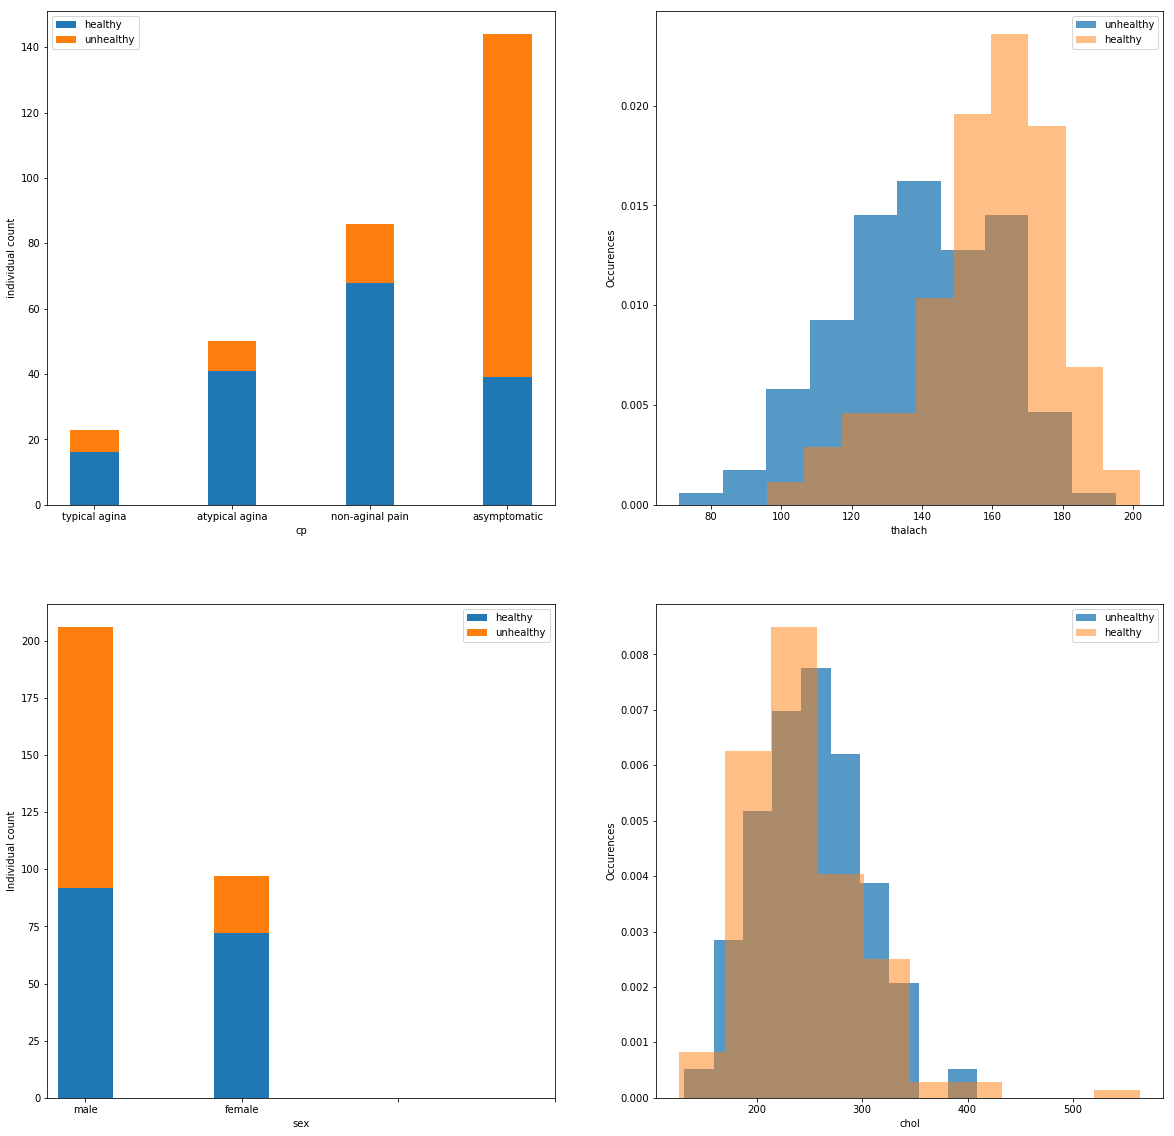

In [81]:
#Importing packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Extracting data from the file
data = np.genfromtxt("processed.cleveland.data", delimiter=",")


#Converting the last column of the dataset into 0's and 1's where 0 mean healthy individual and 1 mean unhealthy individual 
for ind in range(len(data)):
    if (int(data[ind,-1]) > 0):
        data[ind,-1] = 1

        
#Slicing the data set into 2 different datasets, data0 being the dataset of all healthy people and data1 being the dataset of all unhealthy people
data0 = data[data[:,-1]==0]
data1 = data[data[:,-1]!=0]



#Plotting the graphs for features
plt.figure(figsize = (20,20))

#cp
plt.subplot(2,2,1)

#Slicing data into categories of chest pain
healthy_typical_aginal=data0[data0[:,2]==1]
healthy_atypical_aginal=data0[data0[:,2]==2]
healthy_non_aginal=data0[data0[:,2]==3]
healthy_asymptomatic=data0[data0[:,2]==4]
unhealthy_typical_aginal=data1[data1[:,2]==1]
unhealthy_atypical_aginal=data1[data1[:,2]==2]
unhealthy_non_aginal=data1[data1[:,2]==3]
unhealthy_asymptomatic=data1[data1[:,2]==4]
a = [len(healthy_typical_aginal), len(healthy_atypical_aginal), len(healthy_non_aginal), len(healthy_asymptomatic)]
b = [len(unhealthy_typical_aginal), len(unhealthy_atypical_aginal), len(unhealthy_non_aginal), len(unhealthy_asymptomatic)]
ypos = np.arange(len(a))
xpos = np.arange(len(b))
plt.bar(ypos,a,width=0.35)
plt.bar(xpos,b,width=0.35,bottom=a)
plt.xticks(ypos, ('typical agina', 'atypical agina', 'non-aginal pain', 'asymptomatic'))
plt.legend(('healthy', 'unhealthy'),loc=2)
plt.xlabel('cp')
plt.ylabel('individual count')


#thalach
plt.subplot(2,2,2)
plt.hist(data1[:,7], normed = True, label = 'x', alpha = 0.75)
plt.hist(data0[:,7], normed = True, label = 'y', alpha = 0.5)
plt.legend(('unhealthy', 'healthy'))
plt.xlabel("thalach")
plt.ylabel("Occurences")


#sex
plt.subplot(2,2,3)

#Slicing data into categories of sex
healthy_male=data0[data0[:,1]==1]
healthy_female=data0[data0[:,1]==0]
unhealthy_male=data1[data1[:,1]==1]
unhealthy_female=data1[data1[:,1]==0]
c = [len(healthy_male), len(healthy_female)]
d = [len(unhealthy_male), len(unhealthy_female)]
zpos = np.arange(len(c))
wpos = np.arange(len(d))
plt.bar(zpos, c, width = 0.35)
plt.bar(wpos, d, width = 0.35, bottom = c)
plt.xticks(ypos, ('male','female'))
plt.legend(('healthy', 'unhealthy'),loc=1)
plt.xlabel('sex')
plt.ylabel('Individual count')


#chol
plt.subplot(2,2,4)
plt.hist(data1[:,4], normed = True, label = 'x', alpha = 0.75)
plt.hist(data0[:,4], normed = True, label = 'y', alpha = 0.5)
plt.legend(('unhealthy', 'healthy'))
plt.xlabel("chol")
plt.ylabel("Occurences")

### Your Report

Answer the questions in the cells reserved for that purpose.

Mathematical equations should be written as LaTex equations; the assignment contains multiple examples of both inline formulas (such as the one exemplifying the notation for the norm of a vector $||\mathbf{x}||$ and those that appear on separate lines, e.g.:

$$
||\mathbf{x}|| = \sqrt{\mathbf{x}^T \mathbf{x}}.
$$



### Submission

Submit your report as a Jupyter notebook via Canvas.  Python code can be displayed in your report if it is short, and helps understand what you have done.  Running the notebook should generate all the plots in your notebook.  If your code is very long, you can submit an additional file called `assignment1.py` that gets imported from your notebook.


### Grading 

Here is what the grade sheet will look like for this assignment.  A few general guidelines for this and future assignments in the course:

  * Your answers should be concise and to the point.  We will take off points if that is not the case.
  * Always provide a description of the method you used to produce a given result in sufficient detail such that the reader can reproduce your results on the basis of the description.  You can use a few lines of python code or pseudo-code.

```
Grading sheet for assignment 1

Part 1:  30 points.

Part 2:  35 points.

Part 3:  35 points.
(20 points):  Histograms of informative/non-informative features.
(15 points):  Discussion of the plots.
```

Grading will be based on the following criteria:

  * Correctness of answers to math problems
  * Math is formatted as LaTex equations
  * Correct behavior of the required code
  * Easy to understand plots 
  * Overall readability and organization of the notebook
  * Effort in making interesting observations where requested.
  * Please make your notebooks as concise as possible.
  